In [19]:

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [20]:
(train_images, _), (_, _) = tf.keras.datasets.cifar10.load_data()
train_images = (train_images - 127.5) / 127.5  # Normalize to the range [-1, 1]


In [21]:
def build_generator():
    model = models.Sequential()
    
    # Project and reshape random noise
    model.add(layers.Dense(4 * 4 * 256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((4, 4, 256)))

    # Upsample to 8x8
    model.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Upsample to 16x16
    model.add(layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Upsample to 32x32
    model.add(layers.Conv2DTranspose(3, (4, 4), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model

generator = build_generator()
generator.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4096)              409600    
                                                                 
 batch_normalization_3 (Bat  (None, 4096)              16384     
 chNormalization)                                                
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 4096)              0         
                                                                 
 reshape_1 (Reshape)         (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose_3 (Conv2D  (None, 8, 8, 128)         524288    
 Transpose)                                                      
                                                                 
 batch_normalization_4 (Bat  (None, 8, 8, 128)        

In [22]:
def build_discriminator():
    model = models.Sequential()

    # Downsample to 16x16
    model.add(layers.Conv2D(64, (4, 4), strides=(2, 2), padding='same', input_shape=(32, 32, 3)))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Downsample to 8x8
    model.add(layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    # Downsample to 4x4
    model.add(layers.Conv2D(256, (4, 4), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

discriminator = build_discriminator()
discriminator.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        3136      
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 128)         131200    
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 8, 8, 128)         0         
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 256)        

In [26]:
discriminator.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])


In [27]:
def train_gan(epochs, batch_size):
    for epoch in range(epochs):
        for _ in range(train_images.shape[0] // batch_size):
            noise = np.random.normal(0, 1, (batch_size, 10))
            generated_images = generator.predict(noise)

            real_images = train_images[np.random.randint(0, train_images.shape[0], batch_size)]

            # Label real and fake images
            real_labels = np.ones((batch_size, 1))
            fake_labels = np.zeros((batch_size, 1))

            # Train discriminator
            d_loss_real = discriminator.train_on_batch(real_images, real_labels)
            d_loss_fake = discriminator.train_on_batch(generated_images, fake_labels)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Train generator
            noise = np.random.normal(0, 1, (batch_size, 10))
            valid_labels = np.ones((batch_size, 1))
            g_loss = gan.train_on_batch(noise, valid_labels)

        # Print progress
        print(f"Epoch {epoch + 1}/{epochs} [D loss: {d_loss[0]} | D accuracy: {10 * d_loss[1]}] [G loss: {g_loss}]")

        # Save generated images at specific intervals
        if epoch % save_interval == 0:
            save_generated_images(epoch, generator)


In [32]:
# Modify the generator input shape to match the noise vector
def build_generator(latent_dim=10):
    model = models.Sequential()
    
    # Project and reshape random noise
    model.add(layers.Dense(4 * 4 * 256, use_bias=False, input_shape=(latent_dim,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((4, 4, 256)))

    # Upsample to 8x8
    model.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Upsample to 16x16
    model.add(layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Upsample to 32x32
    model.add(layers.Conv2DTranspose(3, (4, 4), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model

# Assuming latent_dim=10
generator = build_generator(latent_dim=10)
generator.summary()





Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 4096)              40960     
                                                                 
 batch_normalization_9 (Bat  (None, 4096)              16384     
 chNormalization)                                                
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_3 (Reshape)         (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose_9 (Conv2D  (None, 8, 8, 128)         524288    
 Transpose)                                                      
                                                                 
 batch_normalization_10 (Ba  (None, 8, 8, 128)        

In [35]:
# Assuming latent_dim=100 for the generator
def build_generator(latent_dim=100):
    model = models.Sequential()
    
    # Project and reshape random noise
    model.add(layers.Dense(4 * 4 * 256, use_bias=False, input_shape=(latent_dim,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((4, 4, 256)))

    # Upsample to 8x8
    model.add(layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Upsample to 16x16
    model.add(layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Upsample to 32x32
    model.add(layers.Conv2DTranspose(3, (4, 4), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model

# Assuming latent_dim=100
generator = build_generator(latent_dim=100)
generator.summary()

def train_gan(epochs, batch_size, latent_dim=100):
    for epoch in range(epochs):
        for _ in range(train_images_subset.shape[0] // batch_size):
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            generated_images = generator.predict(noise)

            # Rest of the training code...
            real_images = train_images[np.random.randint(0, train_images.shape[0], batch_size)]

            # Label real and fake images
            real_labels = np.ones((batch_size, 1))
            fake_labels = np.zeros((batch_size, 1))

            # Train discriminator
            d_loss_real = discriminator.train_on_batch(real_images, real_labels)
            d_loss_fake = discriminator.train_on_batch(generated_images, fake_labels)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Train generator
            noise = np.random.normal(0, 1, (batch_size, 10))
            valid_labels = np.ones((batch_size, 1))
            g_loss = gan.train_on_batch(noise, valid_labels)

        # Print progress
        print(f"Epoch {epoch + 1}/{epochs} [D loss: {d_loss[0]} | D accuracy: {10 * d_loss[1]}] [G loss: {g_loss}]")

        # Save generated images at specific intervals
        if epoch % save_interval == 0:
            save_generated_images(epoch, generator)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4096)              409600    
                                                                 
 batch_normalization_12 (Ba  (None, 4096)              16384     
 tchNormalization)                                               
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_4 (Reshape)         (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose_12 (Conv2  (None, 8, 8, 128)         524288    
 DTranspose)                                                     
                                                                 
 batch_normalization_13 (Ba  (None, 8, 8, 128)        

# Explore the Latent Space when Generating images

1/1 [==============================] - 0s 64ms/step


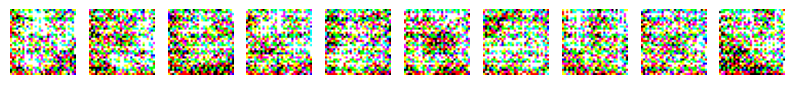

In [17]:
def explore_latent_space(generator, num_samples=10, latent_dim=100):
    fig, axs = plt.subplots(1, num_samples, figsize=(num_samples, 1))
    
    for ax in axs:
        ax.axis('off')

    for i in range(num_samples):
        # Generate noise vector
        noise = np.random.normal(0, 1, (1, latent_dim))

        # Generate image from the noise
        generated_image = generator.predict(noise)

        # Rescale generated image to [0, 1]
        generated_image = 0.5 * generated_image + 0.5

        axs[i].imshow(generated_image[0, :, :, :])
        axs[i].axis('off')

    plt.show()

# Example of exploring latent space
explore_latent_space(generator, num_samples=10)
